In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
import pandas as pd 
datasets= pd.read_csv("known.csv")


In [0]:
datasets[:5] 

,chromosome number,start position,end position,number of Un-methylated Reads,number of Methylated reads,Beta Value
0,15,17000186,17000188,14,10,0.416667
1,15,17000252,17000254,3,32,0.914286
2,15,17000408,17000410,27,55,0.670732
3,15,17000423,17000425,2,91,0.978495
4,15,17000530,17000532,56,174,0.756522


In [0]:
X = datasets.iloc[:,[3,4]].values
Y = datasets.iloc[:,5].values

In [0]:
# datasets.head()
print(X)

[[14 10]
 [ 3 32]
 [27 55]
 ...
 [ 5 48]
 [18 37]
 [ 3 21]]


In [0]:
from sklearn.model_selection import train_test_split

In [0]:

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [0]:
# Fitting Simple Linear Regression to the training set
from sklearn.linear_model import LinearRegression
r= LinearRegression()
r.fit(X_Train, Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print('Coefficients: \n', r.coef_)

Coefficients: 
 [-0.01741848  0.0066586 ]


In [0]:
# Predicting the Test set result ￼

Y_Pred = r.predict(X_Test)
Y_Pred

array([0.98810165, 0.49478682, 0.80113027, ..., 0.76576267, 0.75350674,
       0.81493017])

In [0]:
Y_Test

array([1.      , 0.454545, 0.84375 , ..., 0.769231, 0.857143, 0.793651])

In [0]:
import sklearn.metrics as metrics
print(metrics.mean_squared_error(Y_Test, Y_Pred))

0.02435713013392247


In [0]:
X_Test

array([[ 0, 42],
       [18, 15],
       [ 5, 27],
       ...,
       [12, 40],
       [ 2, 12],
       [13, 50]])

In [0]:
# Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_Test, Y_Pred))
print('MSE:', metrics.mean_squared_error(Y_Test, Y_Pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_Test, Y_Pred)))

MAE: 0.0990558839724689
MSE: 0.02435713013392247
RMSE: 0.15606771009380022


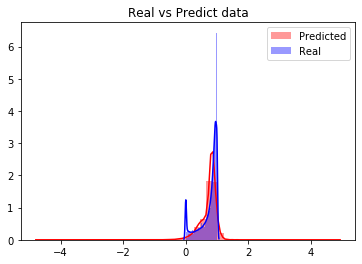

In [0]:
# Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().



import seaborn as sns
sns.distplot((Y_Pred),bins=50,color="r", label="Predicted")
sns.distplot((Y_Test),bins=50,color="b", label="Real")
plt.title("Real vs Predict data")
plt.legend()

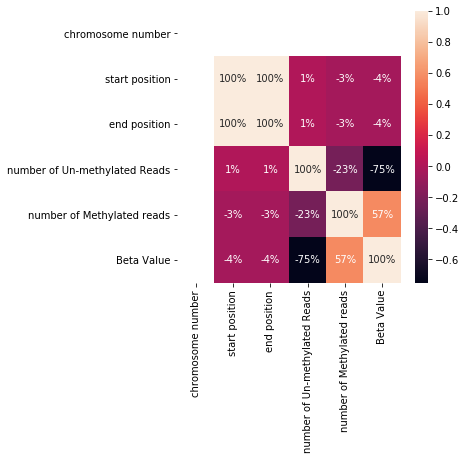

In [0]:
#Visualize the correlation by creating a heat map.
import seaborn as sns
plt.figure(figsize=(5,5))  
sns.heatmap(datasets.corr(), annot=True, fmt='.0%')

In [0]:
# print the R-squared value for the model
r.score(X_Train, Y_Train)

0.73206521421637

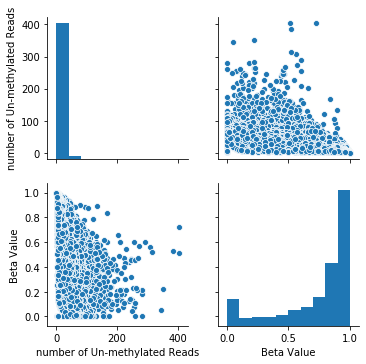

In [0]:
sns.pairplot(datasets.iloc[:,[3,5]])

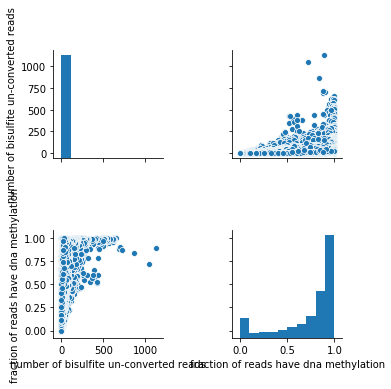

In [0]:
sns.pairplot(datasets.iloc[:,[4,5]])

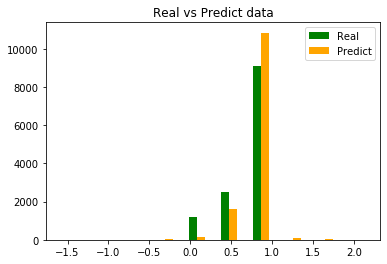

In [0]:
plt.hist([Y_Test,Y_Pred],rwidth=.5, color=['green','orange'],label=['Real','Predict'])
plt.title("Real vs Predict data")
plt.legend()